# Support Vector Machines (SVM) para regresión

Las SVM sirven para regresiones lineales y no lineales. En la regresión se intenta minimizar el error entre la predicción y los datos. En SV el objetivo es que los errores no superen el umbral establecido

1. Se elige un conjunto de entrenamiento
2. Se elige un núcleo y sus parametros
3. Se crea la matriz de correlaciones
4. Se entrena el modelo de forma exacta o aproximada para obtener los coeficientes de contracciones
5. Utilizar estos coeficientes para crear un estimador

1. El núcleo puede ser:
    1. Lineal: $<x,y>$
    2. No lineal: $<\phi(x), \phi(y)> = K(x,y)$
        1. Gaussiano
    

3. Matriz de Correlacion
$$K_{i,j}= exp\left(\sum_k \theta_k|x_k^{i} - x_k^j|^2\right) +\epsilon\delta_{i,j}$$

Paso de optimización 
$$K\vec{\alpha} = \vec{y}$$
1. $\vec{y}$ es el vector de valores del conjunto de entrenamiento
2. $K$ es la matriz de correlación
3. $\vec{\alpha}$ es el conjunto de incognitas $$\vec{\alpha} =K^{-1}\vec{y}$$

Se utilizan los coeficientes de optimización y el kernel elegido

Para estimar el valor $y^{*}$ para un punto de test $x^{*}$
se calcula el vector de correlaciones $\vec{k}$ $$k_i = exp\left(\sum_k\theta_k^{i}|x_k^{i}-x_k^{*}|^2\right)$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Pre Procesado de Datos

In [3]:
X = dataset.iloc[:, 1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y = dataset.iloc[:, 2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

# Escalado de Datos

En este caso si es necesario hacer el escalado de datos, de lo contrario el modelo resultante es una recta horizontal

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

## Crear modelo de regresión con el dataset

In [6]:
from sklearn.svm import SVR

In [7]:
regression = SVR(kernel = "rbf")

In [8]:
regression.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Haciendo predicciones

In [9]:
y_pred = regression.predict(sc_X.transform([[6.5]]))
y_pred

array([-0.27861589])

y_pred está escalado. Para recuperar los datos en la escala original:


In [10]:
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([170370.0204065])

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)

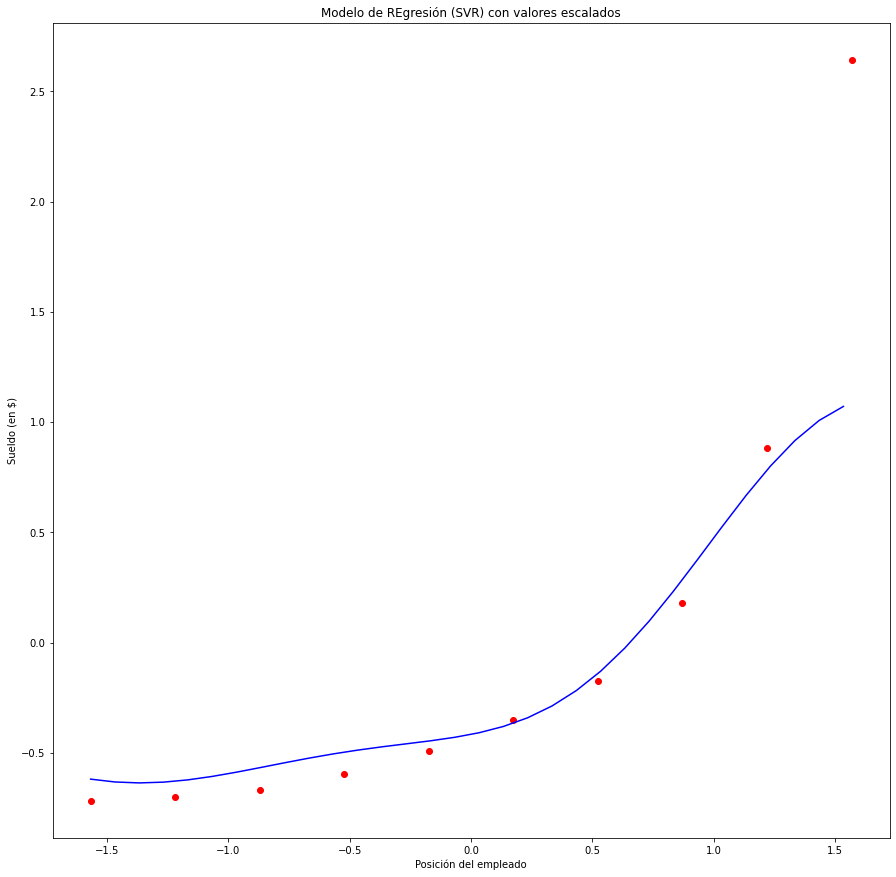

In [28]:
plt.figure(figsize = (15,15))
plt.scatter(X,y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de REgresión (SVR) con valores escalados")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

In [21]:
sc_y.inverse_transform(y)

array([[  45000.],
       [  50000.],
       [  60000.],
       [  80000.],
       [ 110000.],
       [ 150000.],
       [ 200000.],
       [ 300000.],
       [ 500000.],
       [1000000.]])

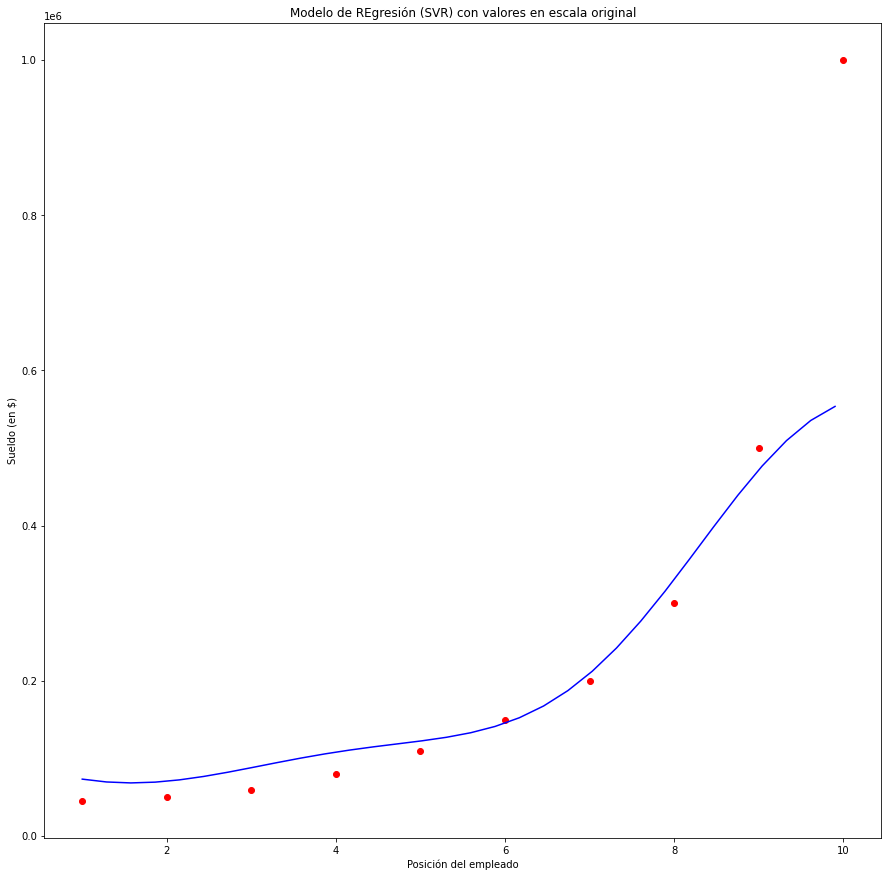

In [27]:
plt.figure(figsize = (15,15))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X_grid), sc_y.inverse_transform(regression.predict(X_grid)), color = "blue")
plt.title("Modelo de REgresión (SVR) con valores en escala original")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()